In [1]:
import sys
sys.path.append('../../MembraneQuant')
from membranequant import *
%matplotlib notebook

In [4]:
path = '/Users/blandt/Desktop/Data/Rundowns/PH rundown August 2019'
paths = direcslist(path, 1)
lines = [p.strip('/').split('/')[-2].split('_')[1] for p in paths]
conditions = [p.strip('/').split('/')[-2].split('_')[2] for p in paths]

imgs = [load_image(p + '/af_corrected.tif') for p in paths]
rois = [np.loadtxt(p + '/ROI_fit.txt') for p in paths]
cytbg = np.loadtxt('../Par2 rundown GFP August 2019/cytbg.txt')
membg = np.loadtxt('../Par2 rundown GFP August 2019/membg.txt')

In [5]:
iq = ImageQuant(img=imgs, cytbg=cytbg, membg=membg, roi=rois, uni_cyt=True, descent_steps=250, iterations=1, 
                rol_ave=5, lr=0.01, interp_type='linear')
iq.run()

100%|██████████| 250/250 [00:23<00:00, 10.77it/s]


Time elapsed: 24.06 seconds 


<IPython.core.display.Javascript object>


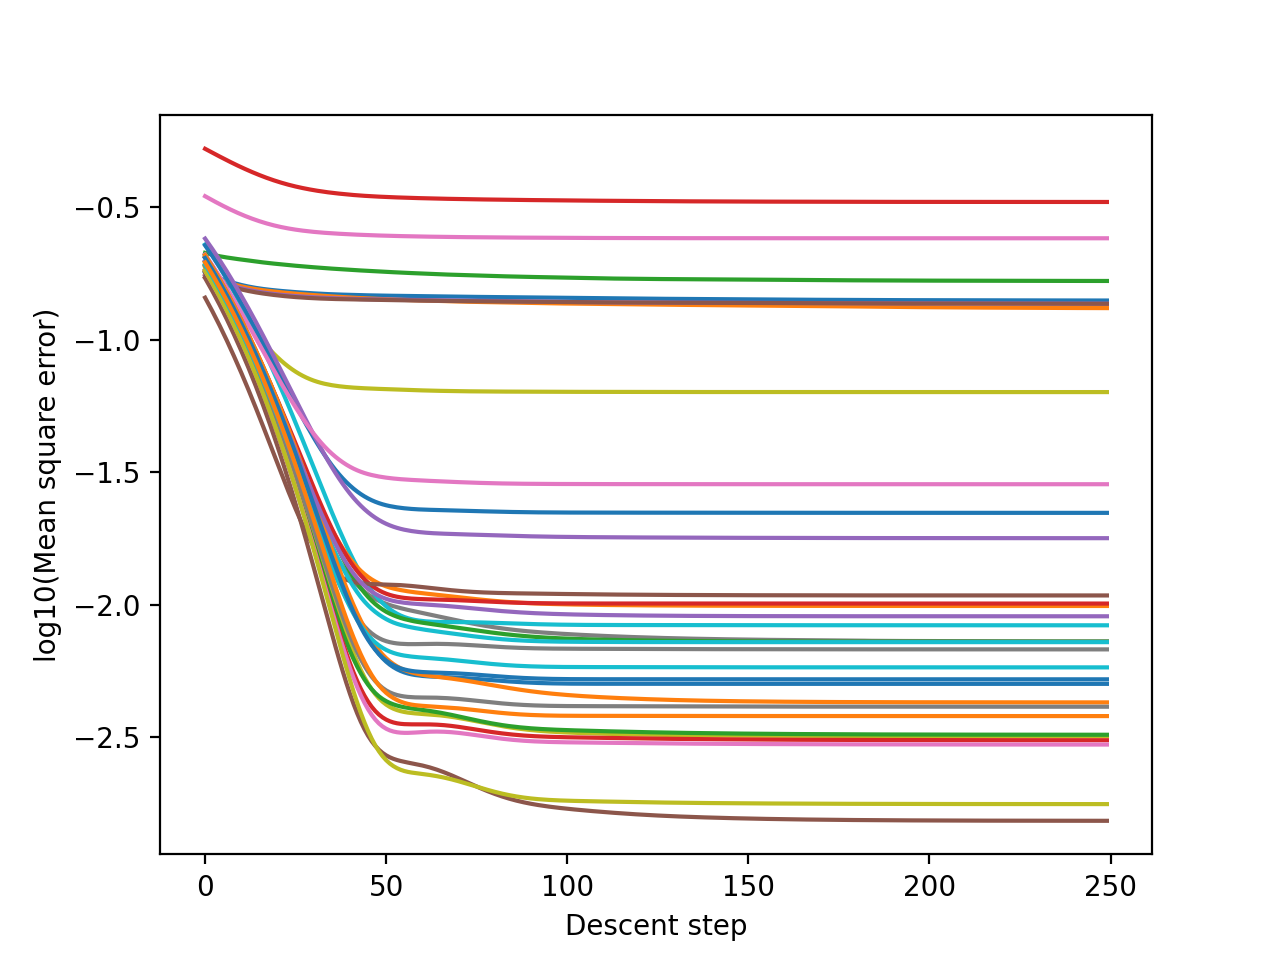

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

In [10]:
iq.plot_losses(log=True)

<IPython.core.display.Javascript object>


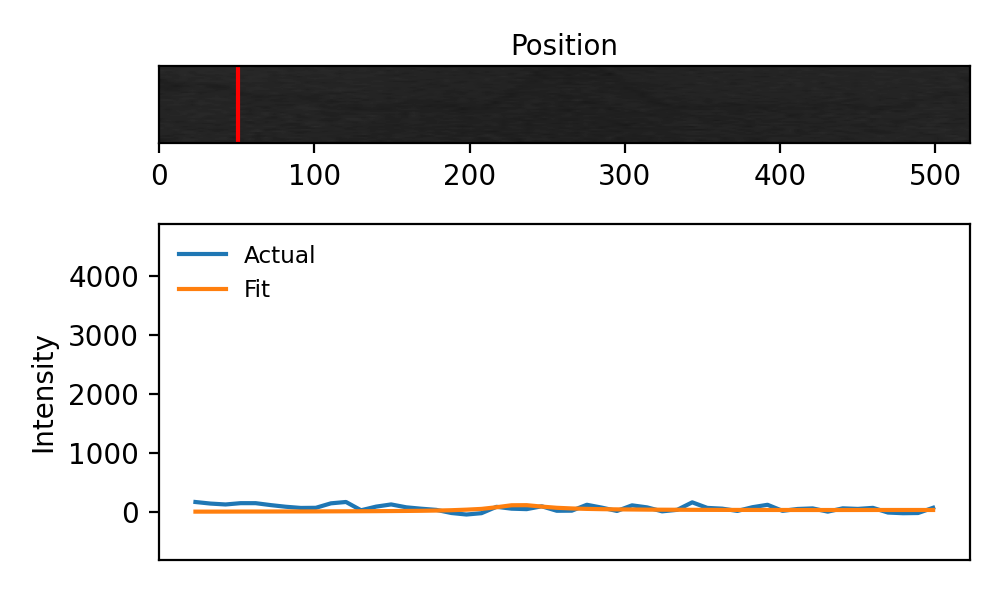

interactive(children=(IntSlider(value=0, description='Frame', max=31), FloatSlider(value=0.1, description='Pos…

(<Figure size 500x300 with 2 Axes>,
 (<AxesSubplot:xlabel='Position'>, <AxesSubplot:ylabel='Intensity'>))

In [11]:
iq.plot_fits(jupyter=True)

### Compile res

In [12]:
res = iq.compile_res()
res.to_csv('res.csv')

In [14]:
res = pd.read_csv('res.csv')
mems = res.groupby('Frame').apply(lambda x: np.mean(x['Membrane signal']))
cyts = res.groupby('Frame').apply(lambda x: np.mean(x['Cytoplasmic signal']))
dosages = [dosage(i, r, 5) for i, r in zip(imgs, rois)]

df_dict = {'Path': paths, 'Line': lines, 'Condition': conditions, 'Membrane': mems, 'Cytoplasm': cyts,
          'Dosage': dosages}
df = pd.DataFrame(df_dict)
df.to_csv('df.csv')